# Problema

<i>Sono date $N$ osservazioni Gaussiane indipendenti di un polinomio. Trovare i coefficienti del polinomio assumendo di conoscere:

 <ul>
  <li>il grado del polinomio e la varianza dei dati</li>
  <li>solo il grado del polinomio (trovare anche la varianza dei dati)</li>
</ul> </i>

# PUNTO 1

Cominciamo con l'analizzare il primo punto.
Il polinomio da studiare è del tipo 

$$P(x)=\beta_0+\beta_1 x+\cdots+\beta_k x^k$$

Possiamo scrivere le $N$ misure in forma matriciale $\vec{y}$, e quindi il problema può essere scritto in forma compatta

$$\vec{y}=W\vec{\beta}+\vec{\varepsilon}$$

che esplicitando abbiamo 

$$\begin{bmatrix}
    y_{1}        \\
    y_{2}        \\
    \cdots       \\
    y_{N} 
\end{bmatrix}
=\begin{bmatrix}
    1 & x_1 &\cdots & x_1 ^k     \\
    1 & x_2 &\cdots & x_2 ^k     \\
    \cdots                        \\
    1 & x_N &\cdots & x_N ^k
\end{bmatrix}\begin{bmatrix}
    \beta_{0}        \\
    \beta_{1}        \\
    \cdots       \\
    \beta_{k} 
\end{bmatrix}+\begin{bmatrix}
    \varepsilon_{0}        \\
    \varepsilon_{1}        \\
    \cdots       \\
    \varepsilon_{N} 
\end{bmatrix}$$

Vogliamo che la speranza matematica degli errori sia nulla $E[\,\vec{\varepsilon}\,]=0$ e cioè chiediamo che la speranza matematica delle misure coincide con il valore vero $E[\,\vec{y}\,]=W\vec{\beta}$.
Abbiamo scelto il seguente polinomio 
$$P(x)=2-7x-3x^2-5x^3+x^5$$

Text(0.5,1,'Grafico di P(x)')

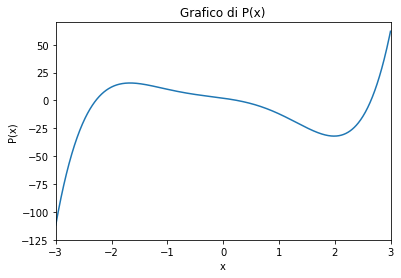

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 1000)  
y = 2-7*x-3*x**2-5*x**3+x**5

plt.plot(x, y)

plt.xlim(-3,3)
plt.ylim(-125, 70)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Grafico di P(x)')


Concentriamo il nostro studio nell'intervallo $[-4,\,4]$, in cui ci sono diversi cambi di concavità. 
Ora dobbiamo decidere come simulare le misure, o meglio con quale intervallo $\Delta x$ prendere le misure. Il modo più semplice, e forse troppo naif, è prendere le misure uniformemente distribuite nell'intervallo  di interesse. Questo non è così diverso, da molti strumenti di misura automatizzati, ad esempio gli strumenti elettronici per misurare la variazione di intensità di un raggio luminoso nel tempo, registrano il valore dell'intensità con un certo intervallo fissato. 
Questo metodo può essere migliorato con una seconda misura: dopo la prima misura stimiamo i coefficienti del polinomio, e così la posizione di eventuali picchi e cambi di flesso, a questo punto possiamo ripetere la misura aumentando la concentrazione delle misure attorno ai questi punti.
Dal teorema di Gauss-Markov sappiamo che la matrice di covarianza $C_\beta$ dei parametri $\beta$ non dipende dalle misure $y_m$, ma solamente dalle variabile certa, nel nostro casi $x_i$. La nostra richiesta è trovare una distribuzioni di $x_i$ che renda $C_\beta$ diagonale e i termini sulla diagonale siano quanto più piccoli possibile (??in accordo con il teorema di Cramer-Rao??). Ossia, in maniera più formale, dato il nostro sistema lineare 
$$\begin{bmatrix}
    y_{1}        \\
    y_{2}        \\
    \cdots       \\
    y_{N} 
\end{bmatrix}
=\begin{bmatrix}
    1 & x_1 &\cdots & x_1 ^k     \\
    1 & x_2 &\cdots & x_2 ^k     \\
    \cdots                        \\
    1 & x_N &\cdots & x_N ^k
\end{bmatrix}\begin{bmatrix}
    \beta_{0}        \\
    \beta_{1}        \\
    \cdots       \\
    \beta_{k} 
\end{bmatrix}$$
Ci spostiamo in una nuova base $\beta '$ che diagonalizzi la matrice $W$, ossia diagonalizziamo; una volta diagonalizzato (se possibile), minimizziamo al variare delle $x_i$ gli autovalori, cioè trovare una relazione tra le $x_i$ che minimizzi la varianza. 

Abbiamo eseguito delle prove su un polinomio di secondo grado che poi tenderemo di estendere a un polinomio di qualsiasi grado. In altre parole, abbiamo analizzato lo spazio delle $x_i$ (con $i=1,\cdots N$) e selezionato la combinazione di $x_i$ in cui è minima la matrice di covarianza.

In [14]:
x0=np.arange(-3.,3.1,0.1)
x1=np.arange(-3.,3.1,0.1)
x2=np.arange(-3.,3.1,0.1)

Cb_old=np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
for i0 in x0:
    for i1 in x1:
        for i2 in x2:
            W=np.matrix([[1, i0, i0**2], [1, i1, i1**2], [1, i2, i2**2]])
        if np.linalg.det(np.matmul(W.transpose(),W))==0:
            pass
        else:
            Cb=np.linalg.inv(np.matmul(W.transpose(),W))
            if (np.absolute(Cb)<=np.absolute(Cb_old)).all():
                Cb_old=Cb
                #print Cb_old
                X=np.array([i0,i1,i2])
print 'la matrice di covarianza minima trovata è'
print Cb_old
print 'le x a cui corrisponde la Cb minima è'
print X

la matrice di covarianza minima trovata è
[[ 1.          0.01149425 -0.11494253]
 [ 0.01149425  0.05771899 -0.00231216]
 [-0.11494253 -0.00231216  0.01981958]]
le x a cui corrisponde la Cb minima è
[ 2.66453526e-15 -2.90000000e+00  3.00000000e+00]


Il risultato è quello che intuitivamente ci aspettavamo, ossia se concentriamo le misure in tre punti, ossia agli estremi e nel vertice, la matrice di covarianza è minima. Questo algoritmo è molto dispendioso in termini di tempo, per un polinomio come il nostro e una ventina di misure il tempo che impiegherebbe non è umanamente ammissibile.

Possiamo "ottimizzare" l'algoritmo di esplorazione dello spazio delle fasi, ossia partendo da $x_i$ random valutiamo la matrice di covarianza, in seguito aumentiamo (o diminuiamo) di un $\Delta$ arbitrario le $x_i$, rivalutiamo 

In [34]:
import matplotlib.pyplot as plt
import numpy as np
g=5 #grado del polinomio
N=6 #numero di misure

X=np.random.uniform(-3,3,N)
Xcopy=X
print X
delta=0.1
step=0
while (step<100):
    step+=1
    print step
    for i in range(0,N,1):
        W=np.matrix([ [x**j for j in range(g+1)] for x in X])
        Cb=np.linalg.inv(np.matmul(W.transpose(),W))
        Xcopy[i]=X[i]+delta
        Wcopy= np.matrix([ [x**j for j in range(g+1)] for x in Xcopy])
        Cbcopy=np.linalg.inv(np.matmul(Wcopy.transpose(),Wcopy))  
        print 'ok'
        check=0
        for col in range(0,g+1):
            for row in range(0,g+1):
                if (Cbcopy.item((row,col))<=Cb.item((row,col))):
                    check+=1
        if (check>=(g+1)**2/2):    
            X[i]=Xcopy[i]
            print 'O+'
        else:
            Xcopy[i]=X[i]-2*delta
            Wcopy= np.matrix([ [x**j for j in range(g+1)] for x in Xcopy])
            Cbcopy=np.linalg.inv(np.matmul(Wcopy.transpose(),Wcopy))
            check=0
            for col in range(0,g+1):
                for row in range(0,g+1):
                    
                    if (np.absolute(Cbcopy.item((row,col)))<=np.absolute(Cb.item((row,col)))):
                        check+=1
            if (check>=(g+1)**2/2):    
                X[i]=Xcopy[i]
                print 'O-'
            else:
                pass
        #if (Xcopy[i]>3 or Xcopy[i]<-3):
            #break
    #print X
    #print Cb

print 'la matrice di covarianza minima trovata è'
print Cb
print 'le x a cui corrisponde la Cb minima è'
print X

[-1.17067267 -0.34653801  0.36674801 -0.7577246   2.3319118  -1.44643825]
1
ok
O-
ok
O+
ok
O+
ok
O-
ok
O+
ok
O+
2
ok
O+
ok
O+
ok
O-
ok
O+
ok
O+
ok
O+
3
ok
O+
ok
O+
ok
ok
O-
ok
O+
ok
O+
4
ok
O+
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
5
ok
O+
ok
O+
ok
O+
ok
O+
ok
O+
ok
O+
6
ok
O+
ok
O+
ok
ok
O+
ok
O-
ok
O+
7
ok
O-
ok
O+
ok
O+
ok
O+
ok
O-
ok
O+
8
ok
O+
ok
O+
ok
O+
ok
O+
ok
O-
ok
O+
9
ok
O+
ok
O+
ok
O+
ok
O+
ok
O+
ok
O+
10
ok
O+
ok
O+
ok
O-
ok
ok
O-
ok
O+
11
ok
O+
ok
O+
ok
O+
ok
O+
ok
O+
ok
O+
12
ok
O+
ok
O-
ok
O+
ok
O+
ok
O-
ok
O+
13
ok
O+
ok
O-
ok
O-
ok
O+
ok
O+
ok
O+
14
ok
ok
O-
ok
O+
ok
O+
ok
O+
ok
15
ok
O-
ok
O+
ok
O-
ok
O+
ok
O+
ok
O-
16
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
O-
17
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
O-
18
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
O-
19
ok
O-
ok
O+
ok
O+
ok
ok
O+
ok
O-
20
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
21
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
22
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
23
ok
ok
O+
ok
O+
ok
O+
ok
O+
ok
24
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok
25
ok
O-
ok
O+
ok
O+
ok
O+
ok
O+
ok

Logicamente non conoscoscendo la posizione dei punti stazionari del nostro polinomio e non potendo analizzare lo spazio dei parametri come per la parabola, in quanto richiederebbe un tempo esponenziale, abbiamo optato per una distribuzione uniforme.

Per utilizzare l'algoritmo di Gauss-Markov per la stima di $\vec{\beta}$, il numero $N$ delle misure deve essere almeno pari al numero dei parametri incogniti. In una prima fase, perciò, prendiamo le misure ad intervalli costanti, e scegliamo i seguenti intervalli:
 <ul>
  <li>$\Delta x=1$ , cioè $N=6$ pari al numero di parametri incogniti</li>
  <li>$\Delta x=0.6$ , cioè $N=10$</li>
  <li>$\Delta x=0.03$ , cioè $N=20$</li>
</ul>

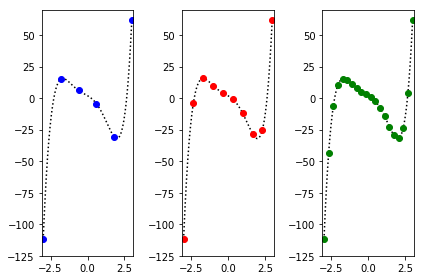

In [19]:
x = np.linspace(-3, 3, 1000)
y = 2-7*x-3*x**2-5*x**3+x**5

plt.subplot(1,3, 1)
plt.plot(x, y, ':k')

plt.xlim(-3.1,3.1)
plt.ylim(-125, 70)
x_m1=np.linspace(-3, 3, 6)
y_m1 = 2-7*x_m1-3*x_m1**2-5*x_m1**3+x_m1**5

plt.plot(x_m1, y_m1, 'bo', label='N=6')


plt.subplot(1, 3, 2)
plt.plot(x, y, ':k')
plt.xlim(-3.1,3.1)
plt.ylim(-125, 70)
x_m2=np.linspace(-3, 3, 10)
y_m2 = 2-7*x_m2-3*x_m2**2-5*x_m2**3+x_m2**5
plt.plot(x_m2, y_m2, 'ro', label='N=10')

plt.subplot(1, 3, 3)
plt.plot(x, y, ':k')
plt.xlim(-3.1,3.1)
plt.ylim(-125, 70)
x_m3=np.linspace(-3, 3, 20)
y_m3 = 2-7*x_m3-3*x_m3**2-5*x_m3**3+x_m3**5
plt.plot(x_m3, y_m3, 'go', label='N=20')
plt.tight_layout()


Per quanto riguarda la varianza, invece, non possiamo fare altro che determinarla empiricamente, o meglio determinare empiricamente uno o più valori che sia ragionevole. Le misure sono equivariate e indipendenti per ipotesi, così da poter scrivere $C_y=\sigma_y I$. Come test di controllo usiamo una $\sigma _y=0$.
 Allora possiamo generare con un generatore di numeri casuali con distribuzione gaussiana.

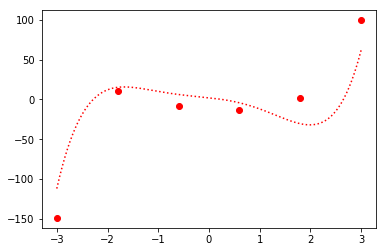

In [15]:
beta_real=np.array([2,-7,-3,-5,0,1]) #questi sono i coefficienti del polinomio
g=5 #grado del polinomio
N=6 #numero di misure
sigma=20
Cy=sigma*np.identity(N)
x_m1=np.linspace(-3, 3, N)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m1[i]**j
#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
#print ym

plt.plot(x, y, ':r')
plt.plot(x_m1, ym, 'ro')






A questo punto basta applicare l'algoritmo di Gauss Markov, per trovare una stima dei parametri $\hat{\beta}$, cioè $$\hat{\beta}=(W^TC_y ^{-1}W)^{-1}W^T C_y^{-1}\vec{y}$$ ma essendo le misure indipendenti si riduce a $$\hat{\beta}=(W^TW)^{-1}W^T \vec{y}$$


I coefficienti sono: 9.346   -54.171   -8.268   12.945   0.389   -0.483
La matrice di covarianza dei parametri stimati è
15.803    4.465    1.466 -6.189  -11.508  -0.546
39.334    11.473    2.023 -6.189  -19.946  -2.07
11.473    14.332    0.965 -11.508  -8.049  -2.095
4.465    11.517    1.425 -19.946  -8.049  -1.231
1.466    1.425    0.324 -2.07  -2.095  -0.169
2.023    0.965    0.135 -0.546  -1.231  -0.169


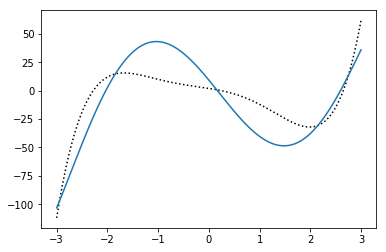

In [8]:
#beta_1=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
#beta_2=np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),ym)
#beta_stima=np.matmul(beta_1,beta_2)
#print beta_stima

beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2+beta_stima[3]*x**3+beta_stima[4]*x**4+beta_stima[5]*x**5
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,3)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,3)) for elem in row if elem<=0]))


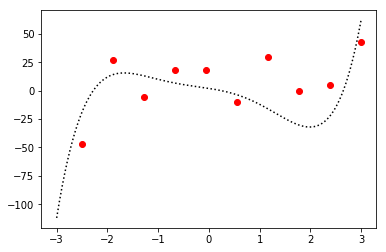

In [9]:
beta_real=np.array([2,-7,-3,-5,0,1]) #questi sono i coefficienti del polinomio
g=5 #grado del polinomio
N=10 #numero di misure
sigma=20
Cy=sigma*np.identity(N)
x_m2=np.linspace(-3+np.random.randint(1,10)/10.0, 3, N)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m2[i]**j
#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
#print ym

plt.plot(x, y, ':k')
plt.plot(x_m2, ym, 'ro')


I coefficienti sono: 6.766   8.033   7.812   -7.402   -1.939   1.231
La matrice di covarianza dei parametri stimati è
7.825    1.133    0.578 -1.55  -4.853  -0.15
13.927    2.604    0.559 -1.55  -5.936  -0.464
2.604    5.419    0.25 -4.853  -1.893  -0.767
1.133    3.06    0.336 -5.936  -1.893  -0.318
0.578    0.336    0.118 -0.464  -0.767  -0.044
0.559    0.25    0.035 -0.15  -0.318  -0.044


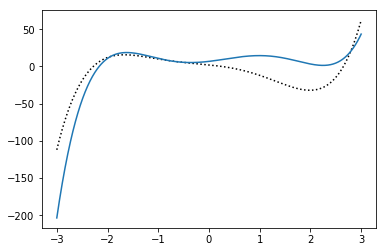

In [10]:
beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2+beta_stima[3]*x**3+beta_stima[4]*x**4+beta_stima[5]*x**5
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,3)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,3)) for elem in row if elem<=0]))

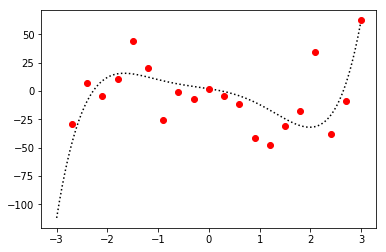

In [11]:
beta_real=np.array([2,-7,-3,-5,0,1]) #questi sono i coefficienti del polinomio
g=5 #grado del polinomio
N=20 #numero di misure
sigma=20
Cy=sigma*np.identity(N)
x_m3=np.linspace(-3+np.random.randint(1,10)/10.0, 3, N)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m3[i]**j
#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
#print ym
x = np.linspace(-3, 3, 1000)
y = 2-7*x-3*x**2-5*x**3+x**5

plt.plot(x, y, ':k')
plt.plot(x_m3, ym, 'ro')


I coefficienti sono: -11.417   -16.072   3.769   -0.217   -0.448   0.48
La matrice di covarianza dei parametri stimati è
3.622    0.289    0.214 -0.418  -2.002  -0.037
6.496    0.667    0.238 -0.418  -2.652  -0.114
0.667    2.001    0.058 -2.002  -0.461  -0.256
0.289    1.298    0.079 -2.652  -0.461  -0.128
0.214    0.079    0.036 -0.114  -0.256  -0.01
0.238    0.058    0.013 -0.037  -0.128  -0.01


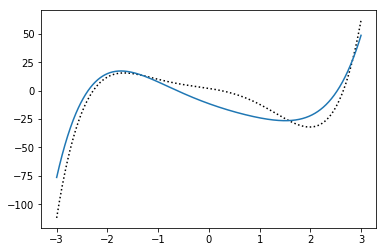

In [12]:
beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2+beta_stima[3]*x**3+beta_stima[4]*x**4+beta_stima[5]*x**5
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,3)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,3)) for elem in row if elem<=0]))


# PUNTO 2

Possiamo ora analizzare il punto 2 del nostro problema. In questo caso ci è noto solamente il grado del polinomio e non conosciamo, come nel caso precedente, la varianza. Per questo, abbiamo usato il metodo della massima verosimiglianza, che ci permette di stimare sia i coefficienti sia la varianza. Questo metodo "riversa" la nostra ignoranza nella distribuzione di probabilità delle misura, ossia per calcolare la verosimiglianza dobbiamo ipotizzare una pdf: noi abbiamo scelto una distribuzione gaussiana. Calcoliamo allora la verosimiglianza $$L\left ( \vec{y} \, |\, \vec{\beta},\sigma^2 \right ) =  \frac{1}{\left (2\pi \sigma^2\right)^{\frac{N}{2}}} e^{-\sum_{i=1}^{N}\frac{\left ( y_i -W\vec{\beta} \right )^2}{2\sigma^2}}$$
dove N è il numero di misure. Allora passiamo al logaritmo $$\log L\left ( \vec{y}|\vec{\beta},\sigma^2 \right )=\log L\left (\vec{\beta},\sigma^2 |\vec{y} \right)=-\log\left ( 2\pi\sigma^2 \right )^{\frac{N}{2}}-\sum _{i=1}^{N}\frac{y_i-W\vec{\beta}}{2\sigma^2}$$ $$=-{\frac{N}{2}}\log\left ( 2\pi\sigma^2 \right )-\sum _{i=1}^{N}\frac{y_i-\sum_{j=0}^{k}W_{ij}\beta_j  }{2\sigma^2}$$
dove k è il grado del polinomio. A questo punto possiamo derivare e cercare i punti stazionari della verosimiglianza al variare dei parametri. $$\frac{\partial}{\partial \beta_\ell}\log L\left (\vec{\beta},\sigma^2 |\vec{y} \right)=- \frac{1}{2\sigma^2}\sum_{i=1}^{N} 2\left ( y_i-\sum_{j=0}^{k} W_{ij}\beta_j\right )\frac{\partial}{\partial \beta_\ell} \left ( y_i-\sum_{j=0}^{k} W_{ij}\beta_j\right ) $$ $$=- \frac{1}{\sigma^2}\sum_{i=1}^{N} \left ( y_i-\sum_{j=0}^{k} W_{ij}\beta_j\right ) W_{i\ell}=- \frac{1}{\sigma^2}\sum_{i=1}^{N} \left ( W_{i\ell}\, y_i-\sum_{j=0}^{k} W_{ij}\,W_{i\ell}\, \beta_j\right ) $$ Così eguagliando a zero possiamo trovare i punti stazionari della funzione di verosimiglianza $$\sum_{i=1}^{N} \left (- W_{i\ell}\, y_i+\sum_{j=0}^{k} W_{ij}\,W_{i\ell}\, \beta_j\right )=0 $$ da cui  $$\sum_{j=0}^{k}\sum_{i=1}^{N} W_{ij}\,W_{i\ell}\, \beta_j -\sum_{i=1}^{N} W_{i\ell}\, y_i=0 $$ $$\sum_{j=0}^{k}\sum_{i=1}^{N} W^T_{ji}\,W_{i\ell}\, \beta_j -\sum_{i=1}^{N} W^T_{\ell i}\, y_i=0 $$ $$\sum_{j=0}^{k}\sum_{i=1}^{N} \left (W^T\,W  \right )_{j\ell}\, \beta_j =\sum_{i=1}^{N} W^T_{\ell i}\, y_i $$ $$\sum_{j=0}^{k}\sum_{i=1}^{N} \left (W^T\,W  \right )^T_{\ell j}\, \beta_j =\sum_{i=1}^{N} W^T_{\ell i}\, y_i$$ in maniera più compatta si può scrivere $$\left (W^T\,W  \right )^T\beta=W^T y$$ $$\left (W^T\,W  \right )\beta=W^T y$$ $$\beta=\left (W^T\,W  \right )^{-1}W^T y$$
Coincide con la stima dei minimi quadrati. Per quanto riguarda la stima della varianza $$\frac{\partial}{\partial \sigma^2}\log L\left (\vec{\beta},\sigma^2 |\vec{y} \right)=-\frac{N}{2} \frac{\partial }{\partial \sigma^2}\log \left ( 2\pi \sigma^2 \right )-\frac{\partial }{\partial \sigma^2} \sum_{i=1}^{N}\frac{\left ( y_i -W\vec{\beta} \right )^2}{2\sigma^2} $$ $$-\frac{N}{2} \frac{1}{\sigma^2}-\sum_{i=1}^{N}\frac{\left ( y_i -W\vec{\beta} \right )^2}{2} \frac{\partial \frac{1}{\sigma^2}}{\partial \sigma^2} =-\frac{N}{2\sigma^2} +\frac{1}{\sigma^4}\sum_{i=1}^{N}\frac{\left ( y_i -W\vec{\beta} \right )^2}{2}  =0 $$
E allora $$-N\sigma^2 +\sum_{i=1}^{N}{\left ( y_i -W\vec{\beta} \right )^2} =0$$ e così finalmente $$\sigma^2 =\frac{1}{N}\sum_{i=1}^{N}{\left ( y_i -W\vec{\beta} \right )^2} $$ che è proprio lo scarto quadratico medio.

La varianza stimata è 18.888930567253325


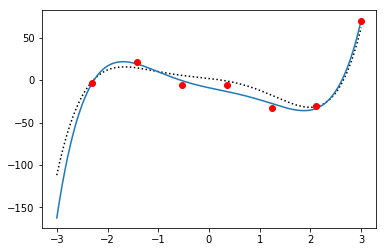

In [13]:
N=7 #numero di misure
x_m=np.linspace(-3+np.random.randint(1,10)/10.0, 3, N)#randomizzo l'intervallo
beta_real=np.array([2,-7,-3,-5,0,1]) #questi sono i coefficienti del polinomio
g=5 #grado del polinomio
sigma=10
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m[i]**j


p=np.matmul(W,beta_real)

ym=np.random.normal(p,sigma)

beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2+beta_stima[3]*x**3+beta_stima[4]*x**4+beta_stima[5]*x**5

plt.plot(x, y,':k')
plt.plot(x, ys)
plt.plot(x_m,ym, 'ro')

scarto=ym-np.matmul(W,beta_stima)
sigma=np.sqrt(np.dot(scarto,scarto)/N)
print 'La varianza stimata è', sigma**2






La varianza stimata è 33.99059080810748


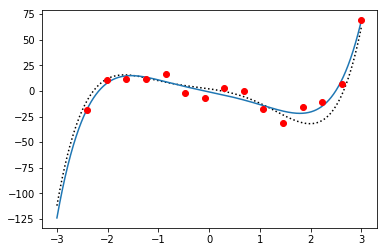

In [14]:
N=15 #numero di misure
x_m=np.linspace(-3+np.random.randint(1,10)/10.0, 3, N)#randomizzo l'intervallo
beta_real=np.array([2,-7,-3,-5,0,1]) #questi sono i coefficienti del polinomio
g=5 #grado del polinomio
sigma=10
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m[i]**j


p=np.matmul(W,beta_real)

ym=np.random.normal(p,sigma)

beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2+beta_stima[3]*x**3+beta_stima[4]*x**4+beta_stima[5]*x**5

plt.plot(x, y,':k')
plt.plot(x, ys)
plt.plot(x_m,ym, 'ro')

scarto=ym-np.matmul(W,beta_stima)
sigma=np.sqrt(np.dot(scarto,scarto)/N)
print 'La varianza stimata è', sigma**2

La varianza stimata è 61.08016850137316


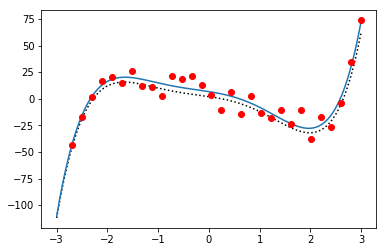

In [15]:
N=30 #numero di misure
x_m=np.linspace(-3+np.random.randint(1,10)/10.0, 3, N)#randomizzo l'intervallo
beta_real=np.array([2,-7,-3,-5,0,1]) #questi sono i coefficienti del polinomio
g=5 #grado del polinomio
sigma=10
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m[i]**j


p=np.matmul(W,beta_real)

ym=np.random.normal(p,sigma)

beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2+beta_stima[3]*x**3+beta_stima[4]*x**4+beta_stima[5]*x**5

plt.plot(x, y,':k')
plt.plot(x, ys)
plt.plot(x_m,ym, 'ro')

scarto=ym-np.matmul(W,beta_stima)
sigma=np.sqrt(np.dot(scarto,scarto)/N)
print 'La varianza stimata è', sigma**2

Adesso che abbiamo trovato le stime di varianza e coefficienti, vogliamo sapere se queste stime sono consistenti e non polarizzate.